In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
import xgboost
from xgboost import XGBClassifier, plot_tree
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [162]:
temp = pd.read_csv('/Users/amarjotsinghlohia/Documents/Dissertation/Data/home-credit-default-risk/application_train_cleaned.csv')
temp.describe()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AGE,EMPLOYMENT_AGE,REGISTRATION_AGE,previous_loan_counts,NO_OF_PREV_APP
count,185176.000000,185176.000000,185176.000000,185176.000000,185176.000000,185176.000000,185176.000000,185176.000000,1.851760e+05,1.851760e+05,...,185176.000000,185176.000000,185176.000000,185176.000000,185176.000000,185176.000000,185176.000000,185176.000000,185176.000000,185176.00000
mean,92597.765083,278155.408152,0.092145,0.103383,0.611289,0.389392,0.670103,0.560980,1.767517e+05,6.049220e+05,...,0.264494,0.066526,1.103113,2.324264,0.199297,38.775071,5.957082,8.360660,2.907866,2.83351
std,53460.575539,102815.431635,0.289231,0.304459,0.487459,0.487614,0.470177,0.791692,1.157994e+05,4.057182e+05,...,0.441065,0.249200,1.066725,0.969894,0.399473,9.564151,5.675427,5.343160,3.905609,2.76027
min,0.000000,100002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.655000e+04,4.500000e+04,...,0.000000,0.000000,0.000000,1.000000,0.000000,20.517808,0.002740,0.002740,0.000000,0.00000
25%,46299.750000,189215.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.725200e+05,...,0.000000,0.000000,0.000000,2.000000,0.000000,31.126027,2.002740,3.408219,0.000000,1.00000
50%,92596.500000,277992.500000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.575000e+05,5.179275e+05,...,0.000000,0.000000,1.000000,2.000000,0.000000,37.676712,4.243836,8.202740,1.000000,2.00000
75%,138895.250000,367284.500000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.160000e+05,8.140410e+05,...,1.000000,0.000000,2.000000,3.000000,0.000000,45.575342,8.065753,12.852055,4.000000,4.00000
max,185194.000000,456255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.800009e+07,4.050000e+06,...,1.000000,1.000000,3.000000,8.000000,1.000000,69.041096,49.073973,18.471233,56.000000,52.00000


In [163]:
#Splitting inot train and test dataset
X = temp.iloc[:,3:]
Y = temp['TARGET']
print(X.head(2))
print(Y.head(2))

   NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0                   0            0             0                1   
1                   0            1             0                0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   

   NAME_TYPE_SUITE  ...  FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  \
0              0.0  ...           1           0                0   
1              1.0  ...           1           0                1   

   CNT_FAM_MEMBERS  ORGANIZATION_TYPE        AGE  EMPLOYMENT_AGE  \
0              1.0                  0  25.920548        1.745205   
1              2.0                  1  45.931507        3.254795   

   REGISTRATION_AGE  previous_loan_counts  NO_OF_PREV_APP  
0          9.994521                   6.0             1.0  
1          3.249315     

In [164]:
list = ['CNT_CHILDREN', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE','NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', ]
X_encoded = pd.get_dummies(X, columns = list)
X_encoded.describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,FLAG_MOBIL,FLAG_EMP_PHONE,...,NAME_INCOME_TYPE_2,NAME_INCOME_TYPE_3,NAME_INCOME_TYPE_4,NAME_EDUCATION_TYPE_0,NAME_EDUCATION_TYPE_1,NAME_EDUCATION_TYPE_2,NAME_EDUCATION_TYPE_3,NAME_FAMILY_STATUS_0,NAME_FAMILY_STATUS_1,NAME_FAMILY_STATUS_2
count,185176.000000,185176.000000,185176.000000,185176.000000,1.851760e+05,1.851760e+05,185176.000000,1.851760e+05,185176.000000,185176.000000,...,185176.000000,185176.000000,185176.000000,185176.000000,185176.000000,185176.000000,185176.000000,185176.000000,185176.000000,185176.000000
mean,0.103383,0.611289,0.389392,0.670103,1.767517e+05,6.049220e+05,27829.372070,5.440579e+05,0.999995,0.999946,...,0.000043,0.913493,0.086377,0.051211,0.665075,0.283131,0.000583,0.156754,0.079973,0.763274
std,0.304459,0.487459,0.487614,0.470177,1.157994e+05,4.057182e+05,14714.307254,3.730258e+05,0.002324,0.007348,...,0.006573,0.281112,0.280921,0.220428,0.471965,0.450521,0.024143,0.363569,0.271251,0.425074
min,0.000000,0.000000,0.000000,0.000000,2.655000e+04,4.500000e+04,1980.000000,4.050000e+04,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.725200e+05,17019.000000,2.430000e+05,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,0.000000,1.000000,1.575000e+05,5.179275e+05,25879.500000,4.500000e+05,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,1.000000,1.000000,2.160000e+05,8.140410e+05,35617.500000,6.885000e+05,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.800009e+07,4.050000e+06,258025.500000,4.050000e+06,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [166]:
#Splitting into training and test data

X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size = 0.25, random_state = 13)
print(X.shape, X_train.shape, X_test.shape, Y.shape, Y_train.shape, Y_test.shape)

(185176, 28) (138882, 57) (46294, 57) (185176,) (138882,) (46294,)


In [167]:
X_test.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,FLAG_MOBIL,FLAG_EMP_PHONE,...,NAME_INCOME_TYPE_2,NAME_INCOME_TYPE_3,NAME_INCOME_TYPE_4,NAME_EDUCATION_TYPE_0,NAME_EDUCATION_TYPE_1,NAME_EDUCATION_TYPE_2,NAME_EDUCATION_TYPE_3,NAME_FAMILY_STATUS_0,NAME_FAMILY_STATUS_1,NAME_FAMILY_STATUS_2
14528,0,1,0,1,180000.0,531265.5,19210.5,373500.0,1,1,...,0,1,0,0,0,1,0,0,0,1
175255,0,0,1,0,117000.0,298512.0,32278.5,270000.0,1,1,...,0,1,0,1,0,0,0,0,0,1
38553,1,1,0,1,135000.0,270000.0,13500.0,270000.0,1,1,...,0,1,0,0,1,0,0,0,0,1
139294,0,1,0,1,180000.0,540000.0,16371.0,540000.0,1,1,...,0,1,0,0,1,0,0,0,0,1
14285,0,0,0,1,135000.0,679896.0,43452.0,630000.0,1,1,...,0,1,0,1,0,0,0,1,0,0


In [187]:
Xgboost_model = xgboost.XGBClassifier(objective = 'binary:logistic', missing = None, seed = 32)
Xgboost_model.fit(X_train, Y_train, verbose = True, early_stopping_rounds = 10, 
                  eval_metric = 'auc', eval_set = [(X_test, Y_test)])

/Users/amarjotsinghlohia/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/amarjotsinghlohia/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.64119
[1]	validation_0-auc:0.64816
[2]	validation_0-auc:0.65137
[3]	validation_0-auc:0.65482
[4]	validation_0-auc:0.65618
[5]	validation_0-auc:0.65825
[6]	validation_0-auc:0.65904
[7]	validation_0-auc:0.66050
[8]	validation_0-auc:0.66280
[9]	validation_0-auc:0.66376
[10]	validation_0-auc:0.66717
[11]	validation_0-auc:0.66828
[12]	validation_0-auc:0.66963
[13]	validation_0-auc:0.66969
[14]	validation_0-auc:0.67017
[15]	validation_0-auc:0.67140
[16]	validation_0-auc:0.67196
[17]	validation_0-auc:0.67280
[18]	validation_0-auc:0.67330
[19]	validation_0-auc:0.67390
[20]	validation_0-auc:0.67410
[21]	validation_0-auc:0.67455
[22]	validation_0-auc:0.67401
[23]	validation_0-auc:0.67438
[24]	validation_0-auc:0.67426
[25]	validation_0-auc:0.67381
[26]	validation_0-auc:0.67371
[27]	validation_0-auc:0.67374
[28]	validation_0-auc:0.67359
[29]	validation_0-auc:0.67335
[30]	validation_0-auc:0.67341


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=None, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=32,
              reg_alpha=0, reg_lambda=1, ...)

In [1]:
#Evaluate model
Y_pred = Xgboost_model.predict(X_test)
Y_pred

NameError: name 'Xgboost_model' is not defined

In [169]:
evaluation_results = Xgboost_model.evals_result()

In [183]:
kfold = StratifiedKFold(n_splits=10)
results = cross_val_score(Xgboost_model, X, Y, cv=kfold)

/Users/amarjotsinghlohia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/amarjotsinghlohia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/amarjotsinghlohia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 105, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/Users/amarjotsinghlohia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/amarjotsinghlohia/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Us

In [185]:
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
print(results)

Accuracy: nan% (nan%)
[nan nan nan nan nan nan nan nan nan nan]


In [188]:
predictions = Xgboost_model.predict(X_test)
print(classification_report(Y_test, predictions))

XGBoostError: [05:18:11] /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/c_api/c_api_utils.h:159: Invalid missing value: null
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x000000011be1d705 dmlc::LogMessageFatal::~LogMessageFatal() + 117
  [bt] (1) 2   libxgboost.dylib                    0x000000011be12a3b xgboost::GetMissing(xgboost::Json const&) + 219
  [bt] (2) 3   libxgboost.dylib                    0x000000011be24b5d void InplacePredictImpl<xgboost::data::ArrayAdapter>(std::__1::shared_ptr<xgboost::data::ArrayAdapter>, std::__1::shared_ptr<xgboost::DMatrix>, char const*, xgboost::Learner*, unsigned long, unsigned long, unsigned long long const**, unsigned long long*, float const**) + 509
  [bt] (3) 4   libxgboost.dylib                    0x000000011be24676 XGBoosterPredictFromDense + 326
  [bt] (4) 5   libffi.7.dylib                      0x000000010980cead ffi_call_unix64 + 85



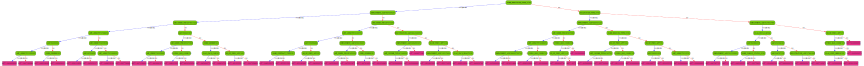

In [ ]:
# Drawing the Tree

node_params = { 'shape': 'box', 'style': 'filled, rounded', 'fillcolor': '#78cbe'}
leaf_params = { 'shape': 'box', 'style': 'filled', 'fillcolor': '#e43088'}

xgb.to_graphviz(Xgboost_model, num_trees = 0, size = '12,10', condition_node_params= node_params, leaf_node_params= leaf_params, rankdir= 'TB')